# Minimal example of Detach-MiniROCKET channel relevance
Test with a complex synthetic dataset.

In [1]:
!pip install aeon --quiet
!pip install tsai --quiet
!pip install sktime --quiet
!pip install git+https://github.com/gon-uri/detach_rocket --quiet
!pip install git+https://github.com/AdriaSolana/detachminirocket-channel-relevance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
from detachminirocket_channel_relevance.classes import ReROCKETTransformer, SoftVoteAvgReROCKETPredictor
from detachminirocket_channel_relevance.synthetic_datasets import ComplexSyntheticDataset
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## A1 MORE relevant than A2, control and noise are not relevant

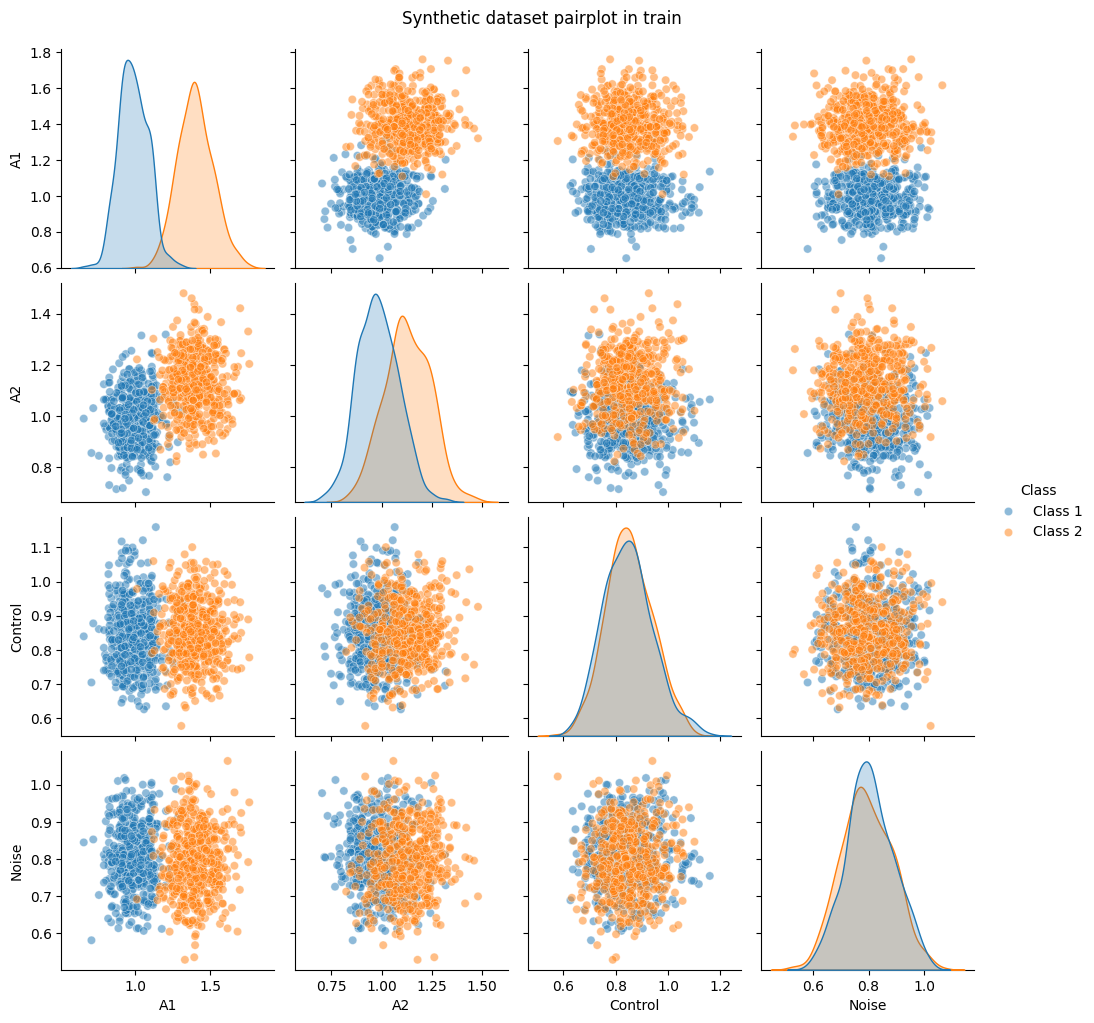

In [3]:
synth_dataset = ComplexSyntheticDataset()

X_train = synth_dataset.train_data
y_train = synth_dataset.train_labels
X_test = synth_dataset.test_data
y_test = synth_dataset.test_labels

synth_dataset.plot_2D()

TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 127.00
Train Accuraccy Detach Model: 99.00%
-------------------------


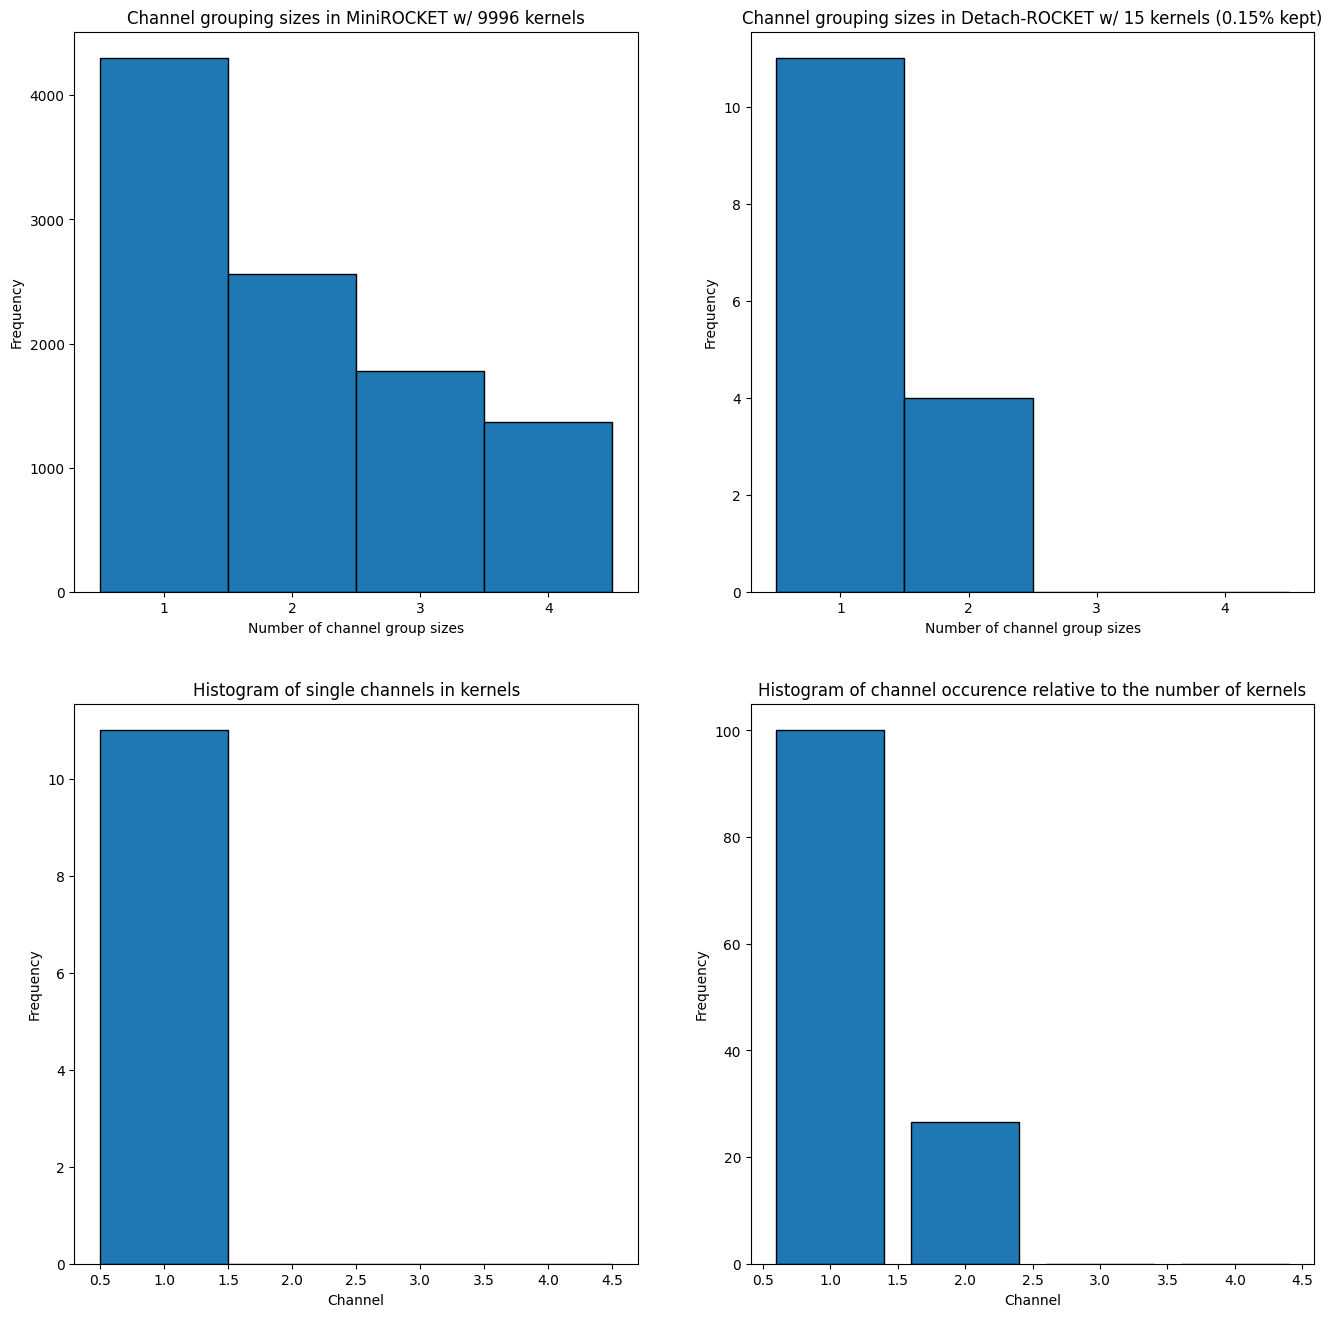

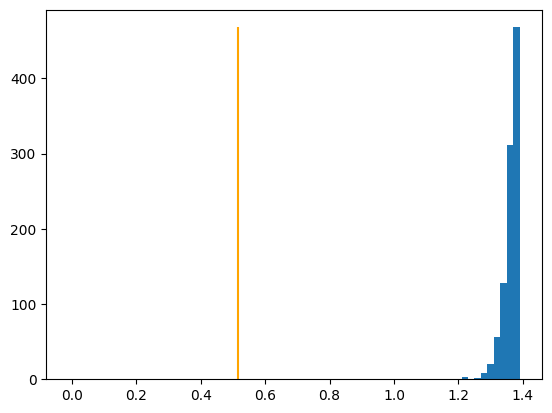

P-value 0.0


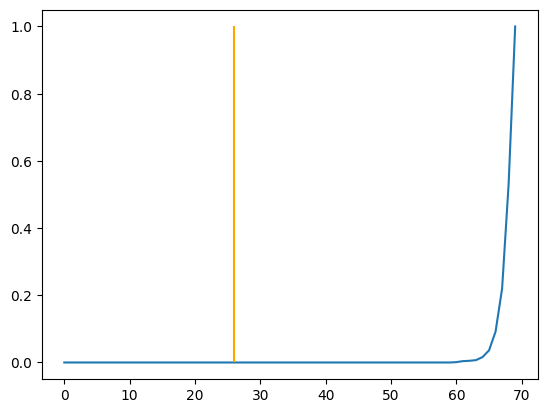

(0.99, 0.984)

In [4]:
num_models = 1
transformer = ReROCKETTransformer('torchminirocket', num_models=num_models, num_kernels=10000, feature_fraction_kept='auto', acc_size_tradeoff_coef=0.1).fit([X_train]*num_models, [y_train]*num_models)
transformer.plot_channel_frequency()
transformer.show_channel_p_value()

X_train_rerocket = transformer.transform([X_train]*num_models)
X_test_rerocket = transformer.transform([X_test]*num_models)

predictor = SoftVoteAvgReROCKETPredictor(transformer.get_classifiers()).fit(X_train_rerocket, y_train)
pred_train = predictor.predict(X_train_rerocket)
pred_test = predictor.predict(X_test_rerocket)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

## A1 LESS relevant than A2, control and noise are not relevant

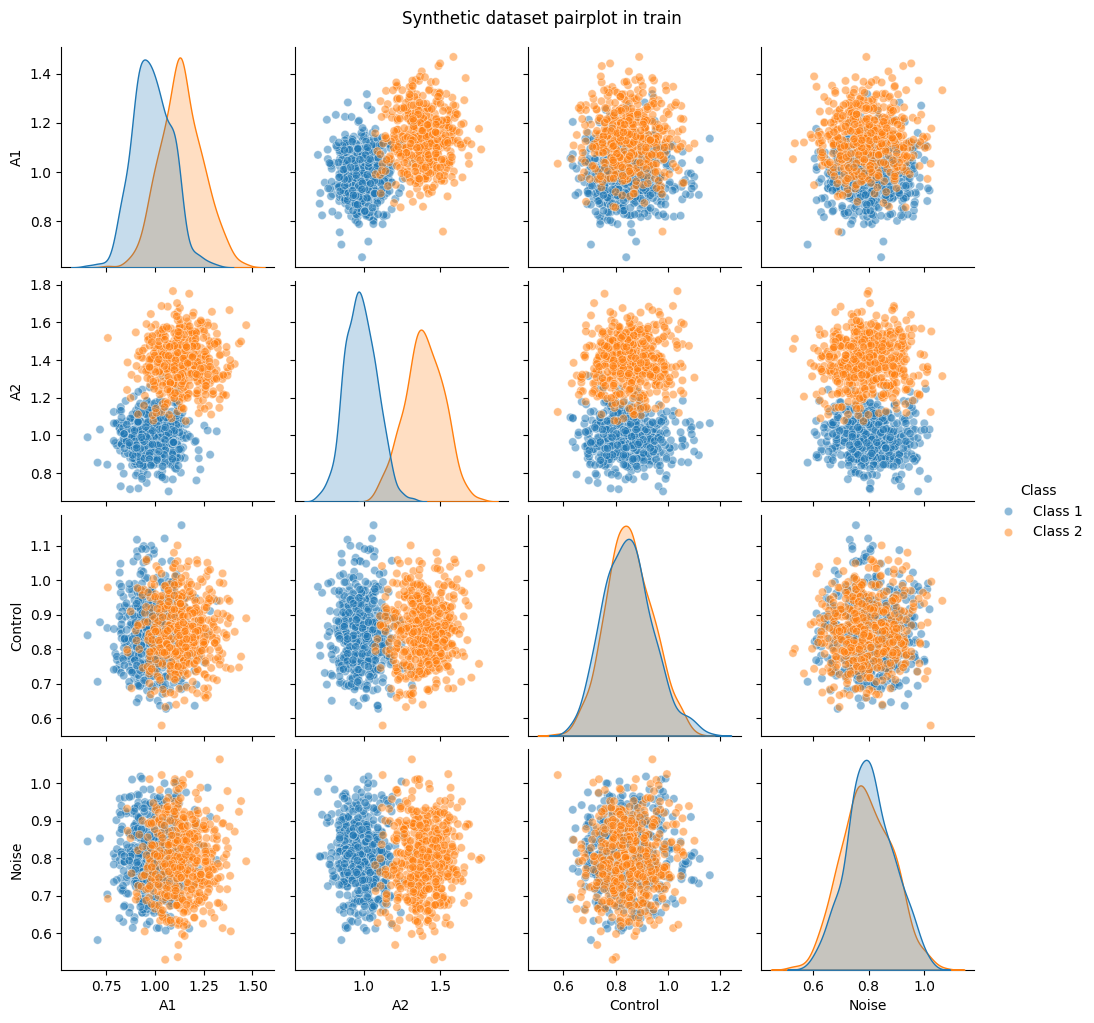

In [5]:
synth_dataset = ComplexSyntheticDataset(Ac2=[1.38, 1.92, 0.5, 0])

X_train = synth_dataset.train_data
y_train = synth_dataset.train_labels
X_test = synth_dataset.test_data
y_test = synth_dataset.test_labels

synth_dataset.plot_2D()

TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 95.00
Train Accuraccy Detach Model: 98.90%
-------------------------


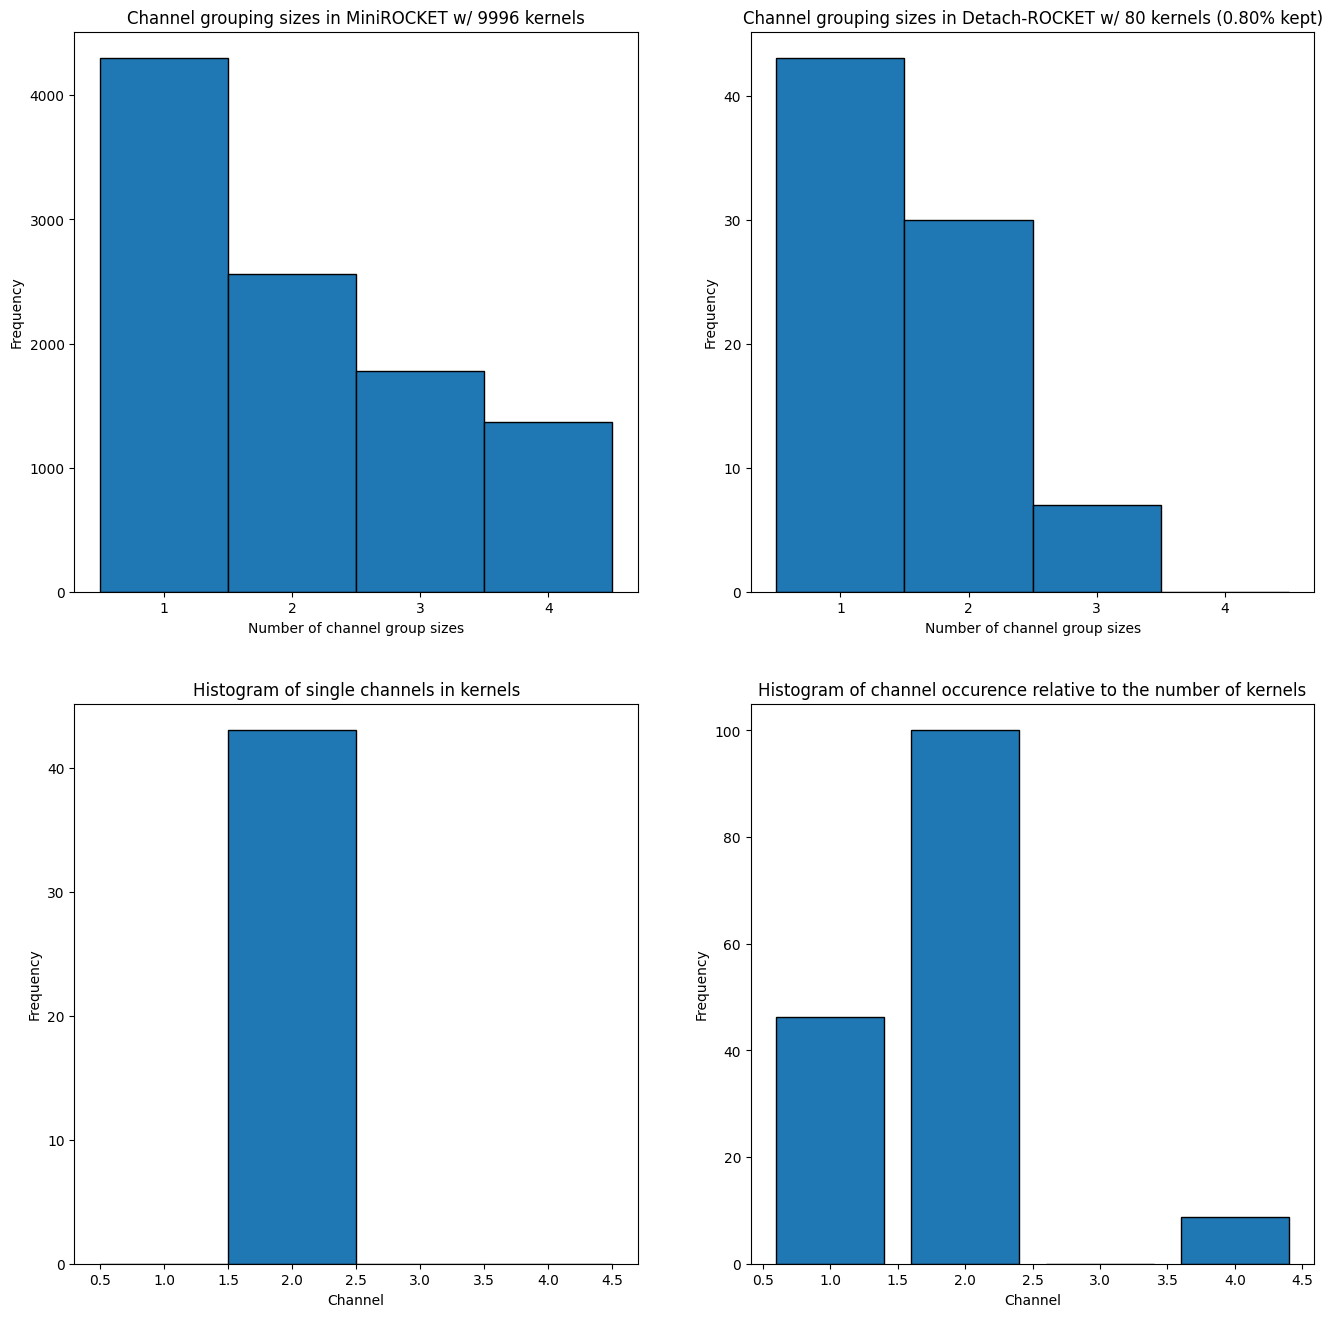

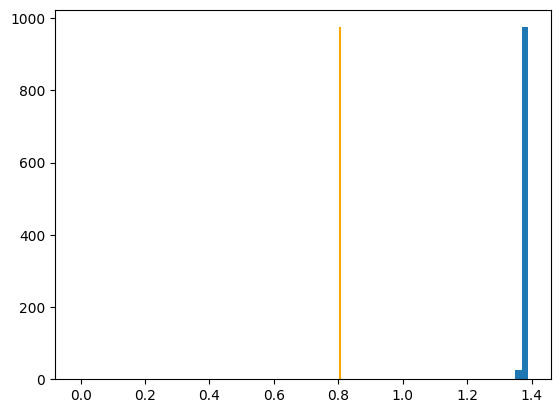

P-value 0.0


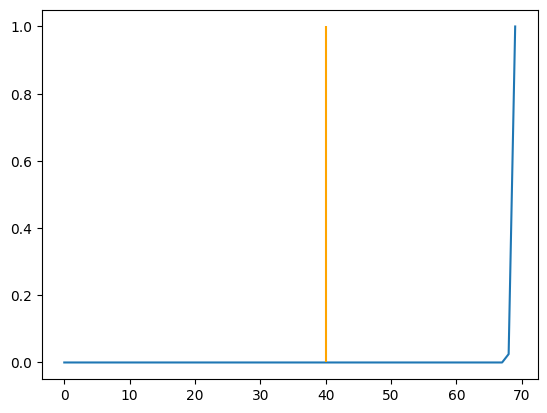

(0.989, 0.989)

In [6]:
num_models = 1
transformer = ReROCKETTransformer('torchminirocket', num_models=num_models, num_kernels=10000, feature_fraction_kept='auto', acc_size_tradeoff_coef=0.1).fit([X_train]*num_models, [y_train]*num_models)
transformer.plot_channel_frequency()
transformer.show_channel_p_value()

X_train_rerocket = transformer.transform([X_train]*num_models)
X_test_rerocket = transformer.transform([X_test]*num_models)

predictor = SoftVoteAvgReROCKETPredictor(transformer.get_classifiers()).fit(X_train_rerocket, y_train)
pred_train = predictor.predict(X_train_rerocket)
pred_test = predictor.predict(X_test_rerocket)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

## A1 EQUALLY relevant than A2, control and noise are not relevant

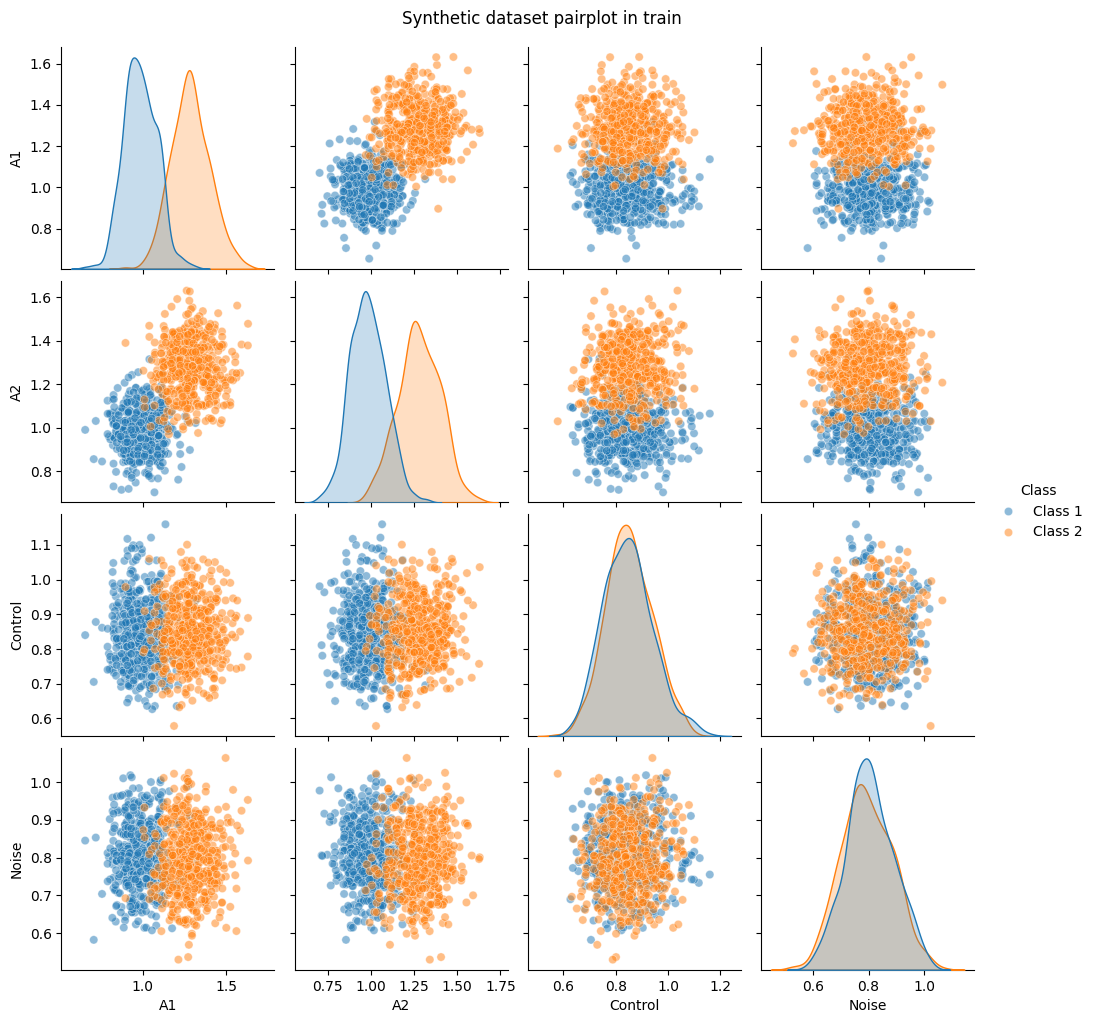

In [10]:
synth_dataset = ComplexSyntheticDataset(Ac2=[1.70, 1.70, 0.5, 0])

X_train = synth_dataset.train_data
y_train = synth_dataset.train_labels
X_test = synth_dataset.test_data
y_test = synth_dataset.test_labels

synth_dataset.plot_2D()

TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 86.00
Train Accuraccy Detach Model: 99.30%
-------------------------


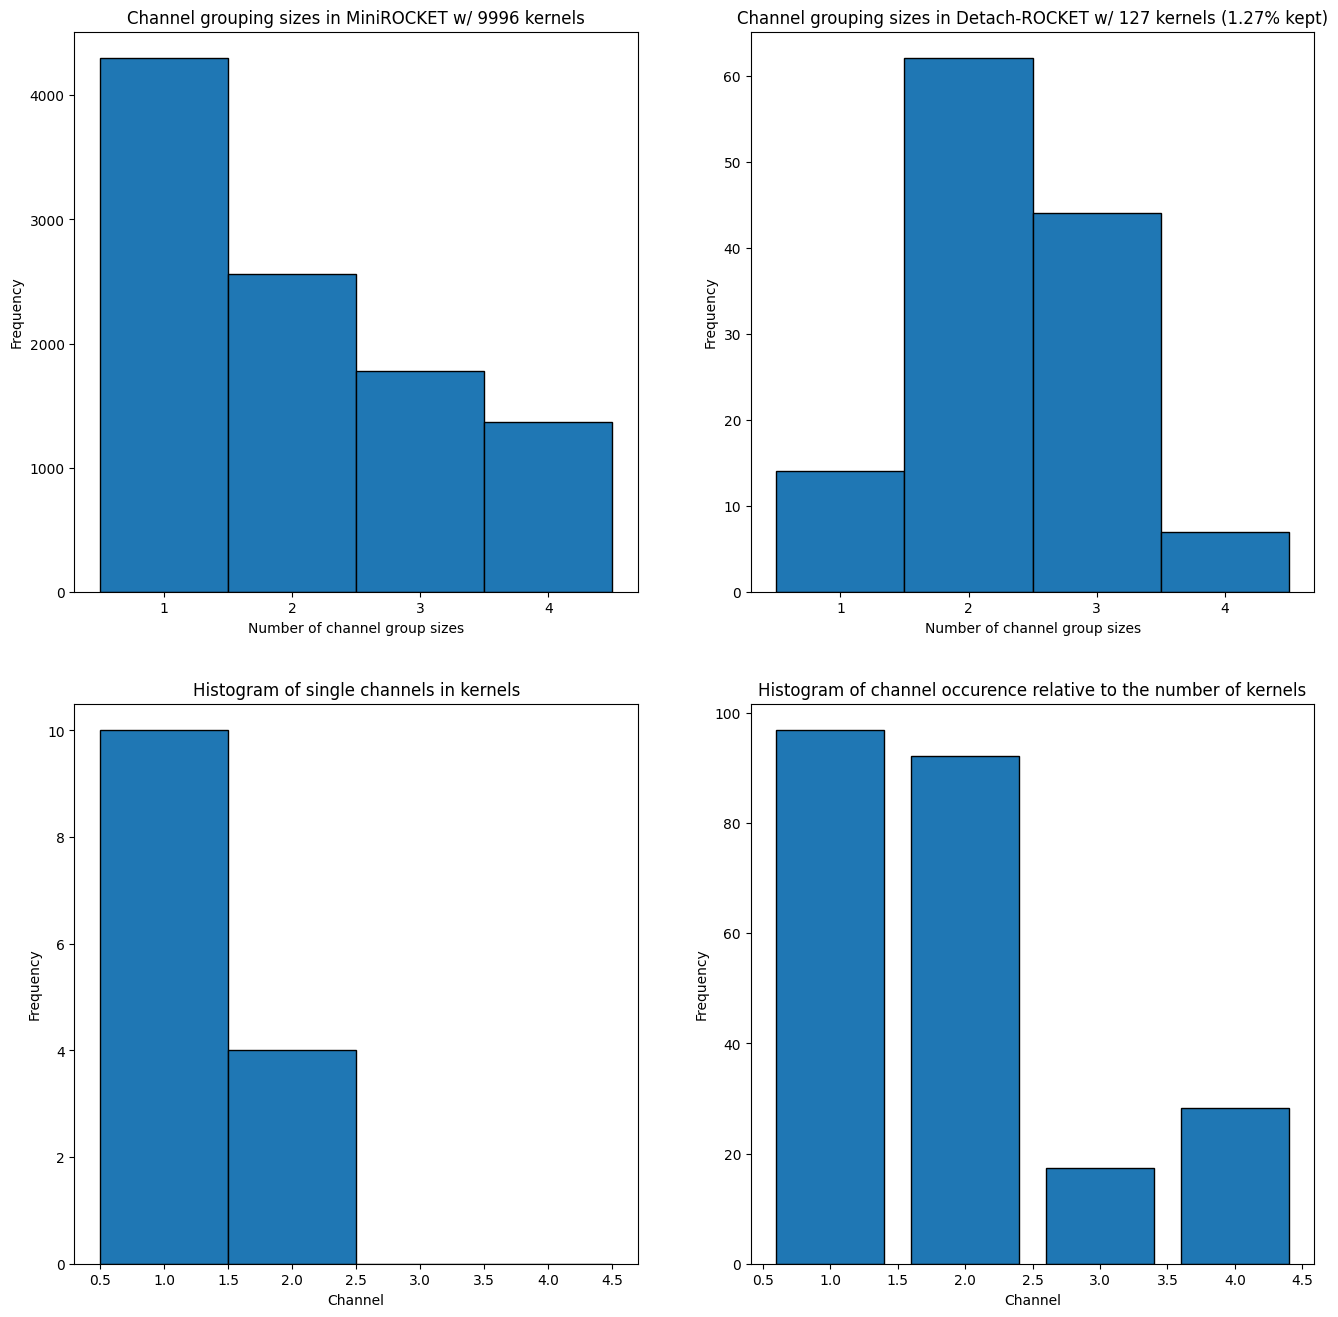

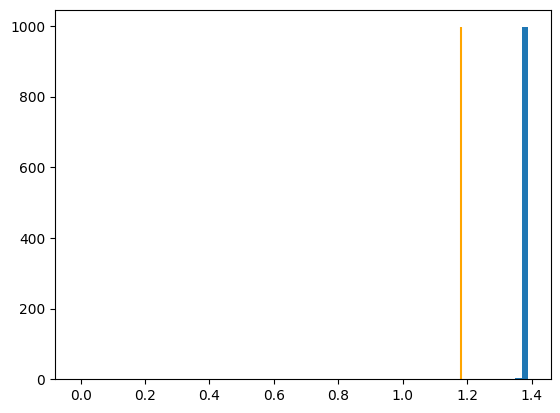

P-value 0.0


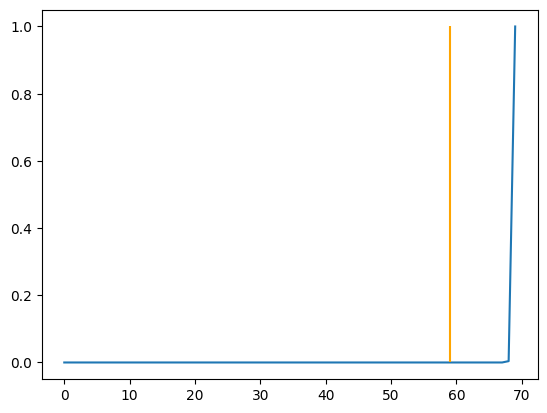

(0.993, 0.984)

In [11]:
num_models = 1
transformer = ReROCKETTransformer('torchminirocket', num_models=num_models, num_kernels=10000, feature_fraction_kept='auto', acc_size_tradeoff_coef=0.1).fit([X_train]*num_models, [y_train]*num_models)
transformer.plot_channel_frequency()
transformer.show_channel_p_value()

X_train_rerocket = transformer.transform([X_train]*num_models)
X_test_rerocket = transformer.transform([X_test]*num_models)

predictor = SoftVoteAvgReROCKETPredictor(transformer.get_classifiers()).fit(X_train_rerocket, y_train)
pred_train = predictor.predict(X_train_rerocket)
pred_test = predictor.predict(X_test_rerocket)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

## A1 ONLY relevant channel; A2, control and noise are not relevant

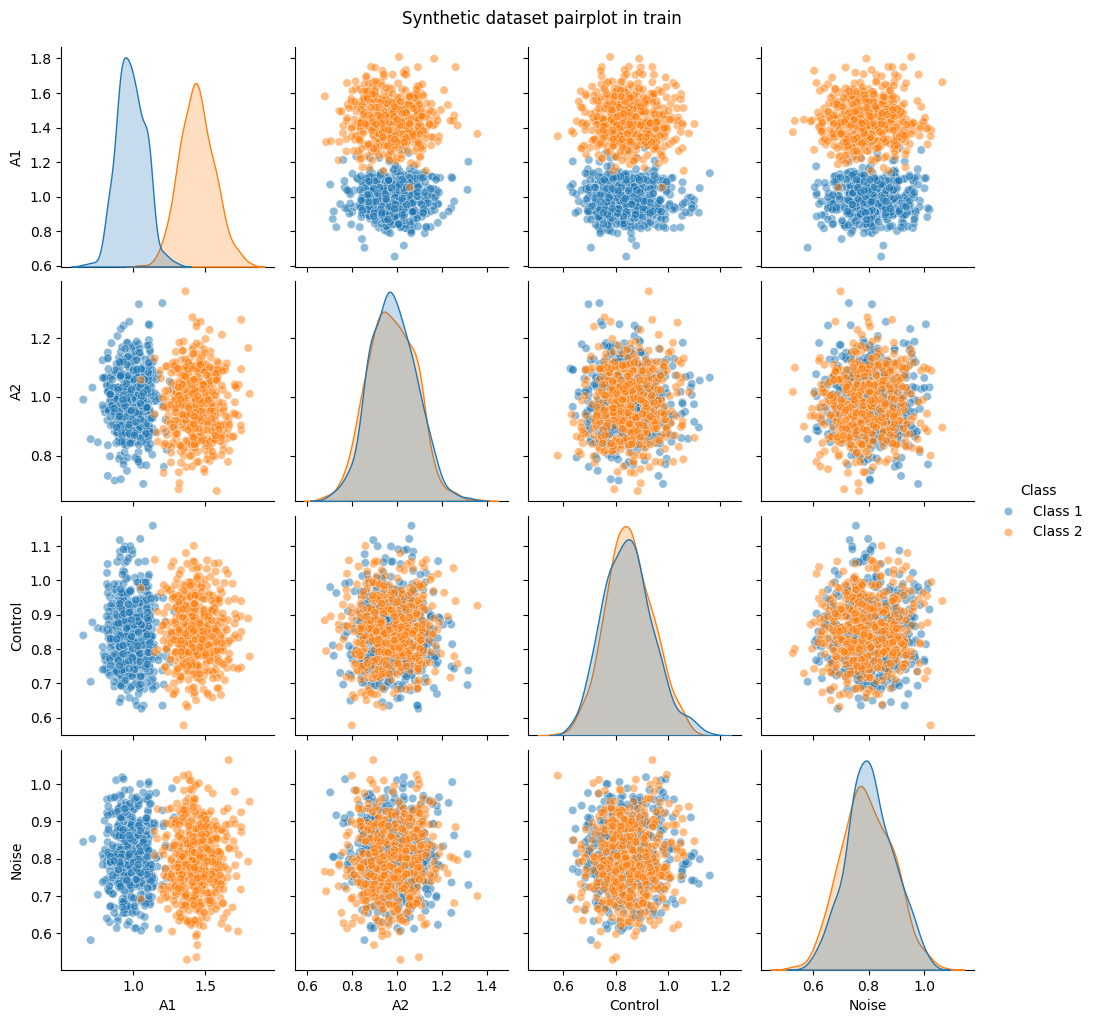

In [8]:
synth_dataset = ComplexSyntheticDataset(Ac2=[2, 1, 0.5, 0])

X_train = synth_dataset.train_data
y_train = synth_dataset.train_labels
X_test = synth_dataset.test_data
y_test = synth_dataset.test_labels

synth_dataset.plot_2D()

TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 109.00
Train Accuraccy Detach Model: 99.50%
-------------------------


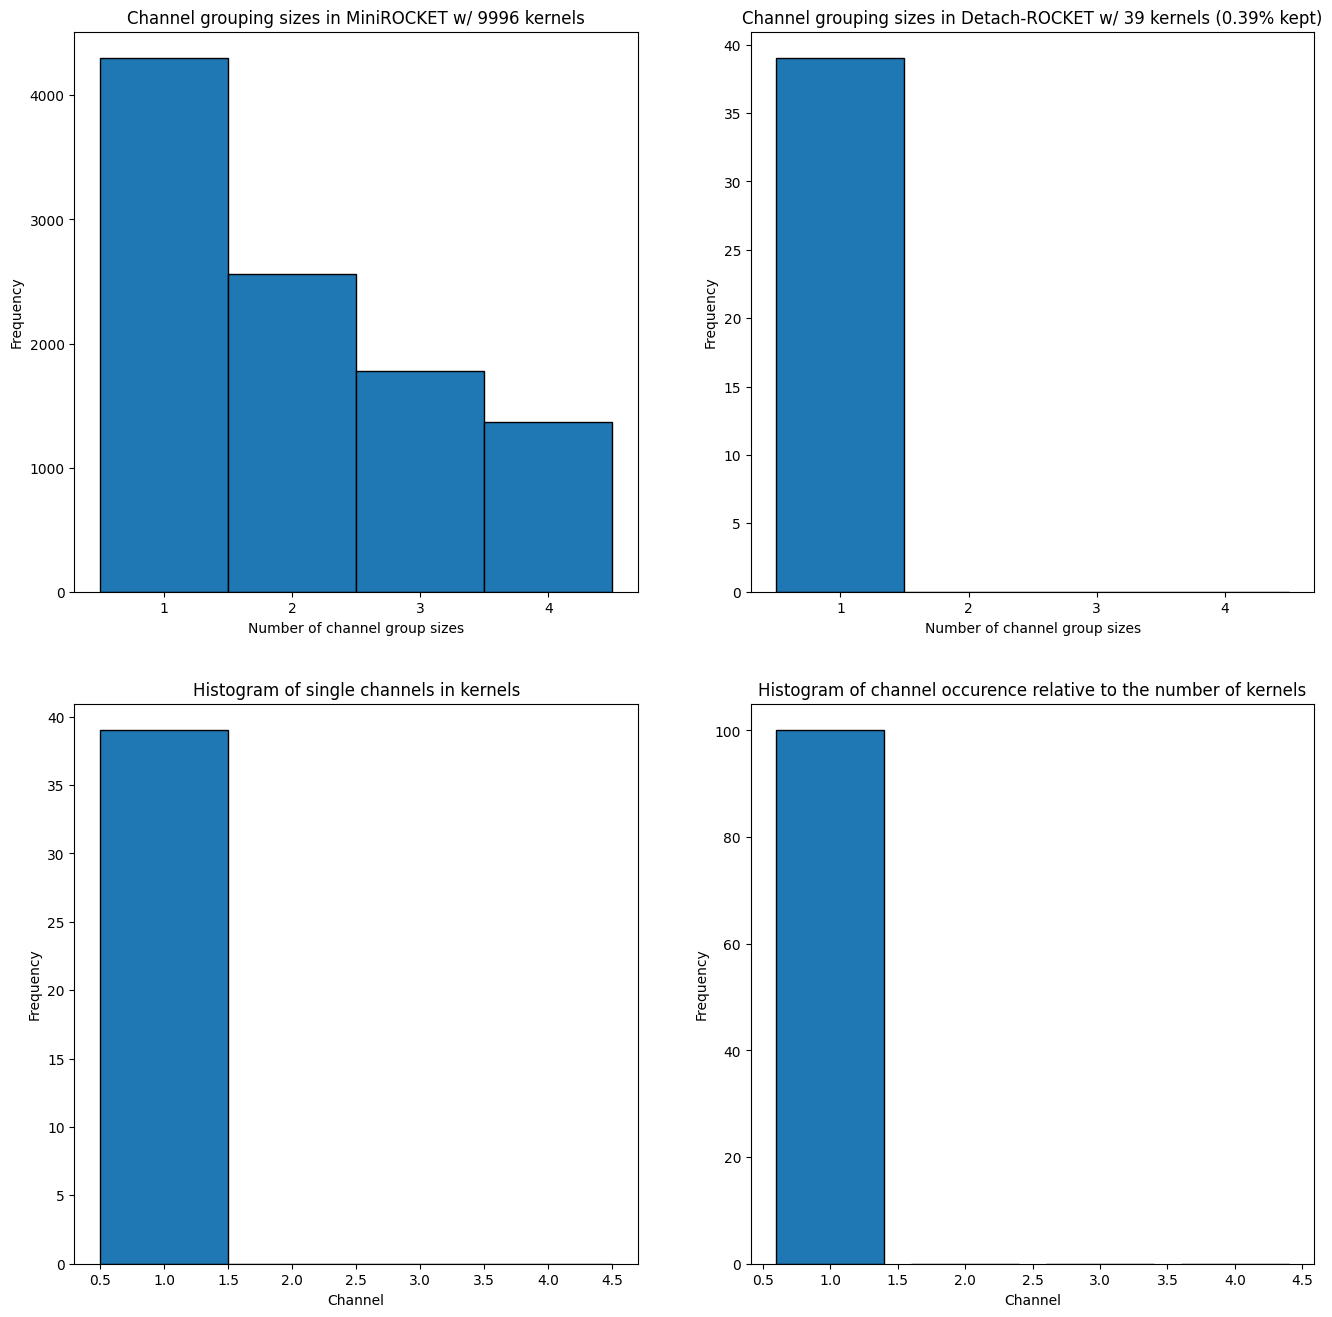

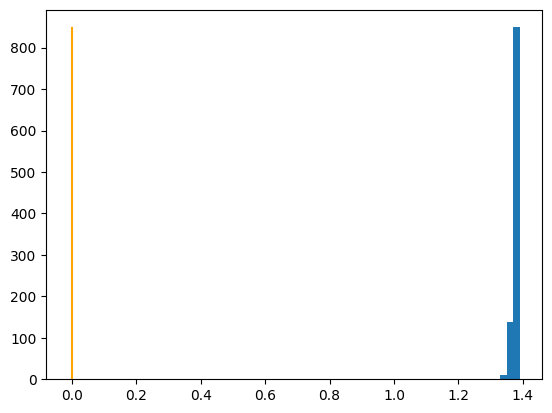

P-value 0.0


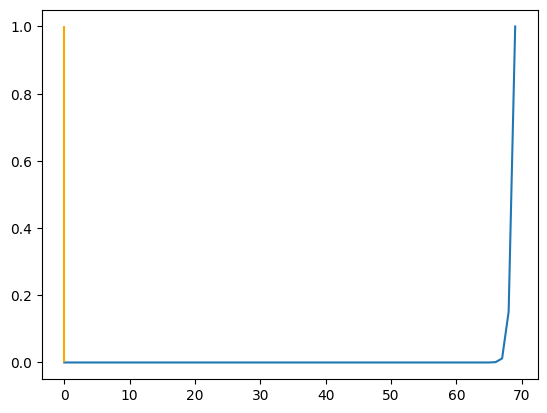

(0.995, 0.987)

In [9]:
num_models = 1
transformer = ReROCKETTransformer('torchminirocket', num_models=num_models, num_kernels=10000, feature_fraction_kept='auto', acc_size_tradeoff_coef=0.1).fit([X_train]*num_models, [y_train]*num_models)
transformer.plot_channel_frequency()
transformer.show_channel_p_value()

X_train_rerocket = transformer.transform([X_train]*num_models)
X_test_rerocket = transformer.transform([X_test]*num_models)

predictor = SoftVoteAvgReROCKETPredictor(transformer.get_classifiers()).fit(X_train_rerocket, y_train)
pred_train = predictor.predict(X_train_rerocket)
pred_test = predictor.predict(X_test_rerocket)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)